In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
#mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
from src.utils import *
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
# import train test split
from sklearn.model_selection import train_test_split
import h5py


In [2]:
cd ..

/home/rd804/m-anode


array([ 0.02562617, -5.66911779])

Available datasets: ['label_0.1', 'label_0.2', 'label_0.5', 'label_0.8', 'label_0.9', 'label_1', 'label_1.5', 'label_10', 'label_2', 'label_5', 'sig_train_0.1', 'sig_train_0.2', 'sig_train_0.5', 'sig_train_0.8', 'sig_train_0.9', 'sig_train_1', 'sig_train_1.5', 'sig_train_10', 'sig_train_2', 'sig_train_5']
Available true_w: ['true_w_0.1', 'true_w_0.2', 'true_w_0.5', 'true_w_0.8', 'true_w_0.9', 'true_w_1', 'true_w_1.5', 'true_w_10', 'true_w_2', 'true_w_5']
Available background_only_fit: ['mu_background', 'sigma_background']
Available best_parameters: ['mu_', 'sigma_', 'w_']


In [3]:
sigs = [0.1,0.2,0.5,0.8,0.9,1,1.5,2,5,10]

In [4]:
sigs = [10, 5, 1.5, 2, 0.5, 0.2, 0.8, 5, 0.1, 0.9 , 1]

In [4]:
import pickle

back_mean = 0
sig_mean = 3
sig_simga = 0.5
back_sigma = 3

best_parameters = {}
best_parameters_modified = {}

with open('data/true_w.pkl', 'rb') as f:
    true_w = pickle.load(f)

with open('results/background_only_fit.pkl', 'rb') as f:
    background_only_fit = pickle.load(f)

with open('results/background_only_fit_modified.pkl', 'rb') as f:
    background_only_fit_modified = pickle.load(f)

for sig in sigs:
    with open(f'results/best_parameters_sig_{sig}.pkl', 'rb') as f:
        best_parameters_ = pickle.load(f)
    best_parameters[str(sig)] = best_parameters_

for sig in sigs:
    with open(f'results/best_parameters_modified_with_weights_100_epochs_em_sig_{sig}.pkl', 'rb') as f:
        best_parameters_ = pickle.load(f)
    best_parameters_modified[str(sig)] = best_parameters_

with open('data/data.pkl','rb') as f:
    data = pickle.load(f)


    

FileNotFoundError: [Errno 2] No such file or directory: 'results/background_only_fit.pkl'

In [ ]:
sig_train = 10

w1 = true_w[str(sig_train)][0]
w2 = true_w[str(sig_train)][1]

In [5]:
[mu_background , sigma_background] = background_only_fit

[mu_background_modified , sigma_background_modified] = background_only_fit_modified


In [6]:
keys = list(best_parameters['0.1'].keys())
keys = [int(key) for key in keys]
print(keys)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[-0.0100381   2.10648115]
[8.99515182 3.80488474]
[0.98656157 0.01343843]


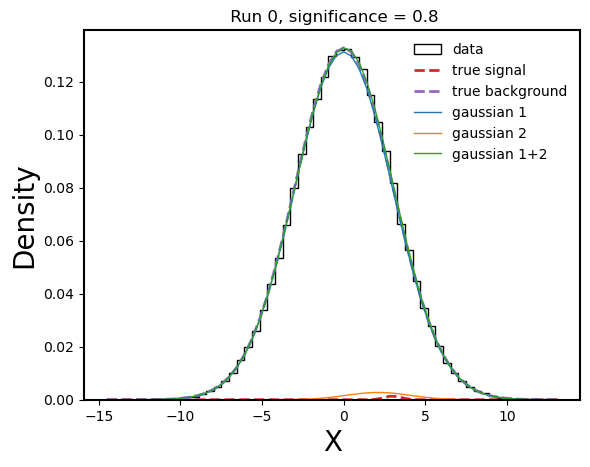

[-0.0100381   1.74804715]
[8.99515182 4.87024031]
[0.98239652 0.01760348]


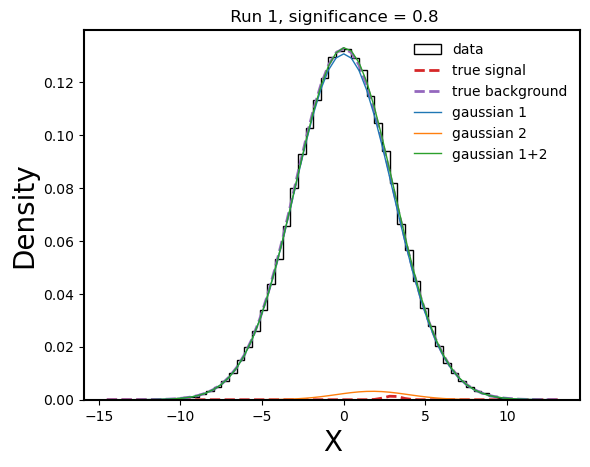

[-0.0100381   0.25514715]
[8.99515182 8.84554089]
[0.88426084 0.11573916]


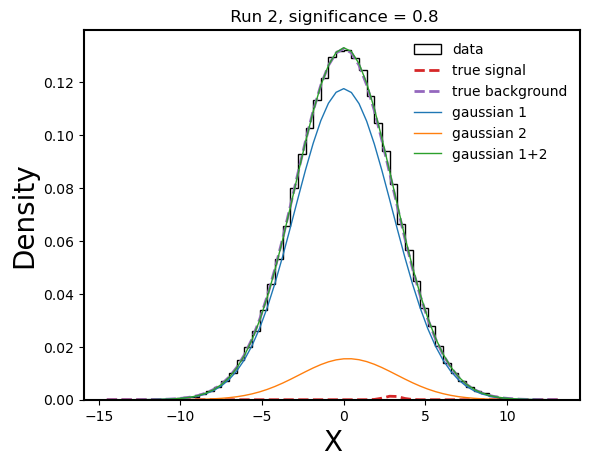

[-0.0100381   2.13546324]
[8.99515182 3.72161467]
[0.98685197 0.01314803]


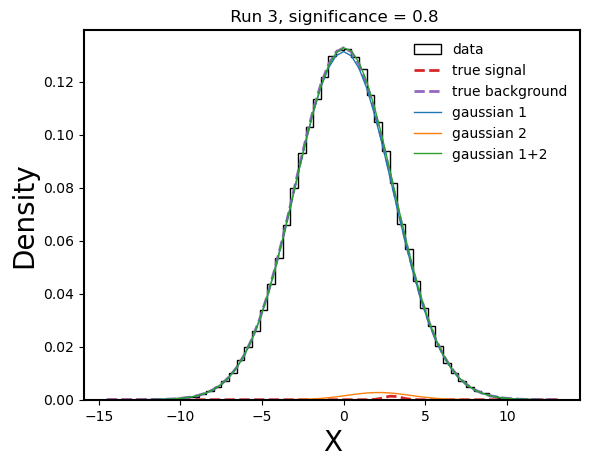

[-1.00380960e-02 -1.06258971e+01]
[8.99515182 2.89557559]
[9.99881418e-01 1.18582354e-04]


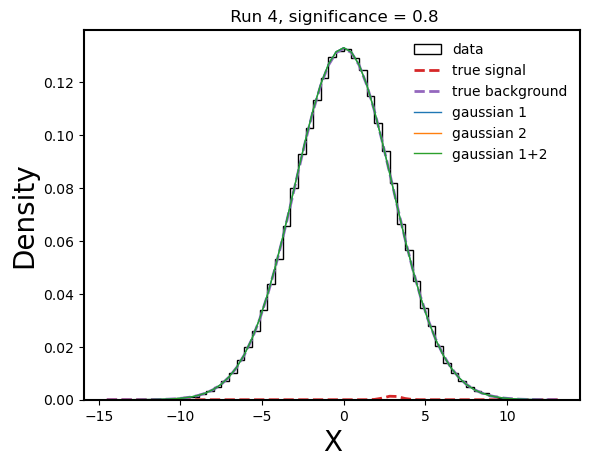

[-0.0100381   0.82273769]
[8.99515182 7.60282883]
[0.96020253 0.03979747]


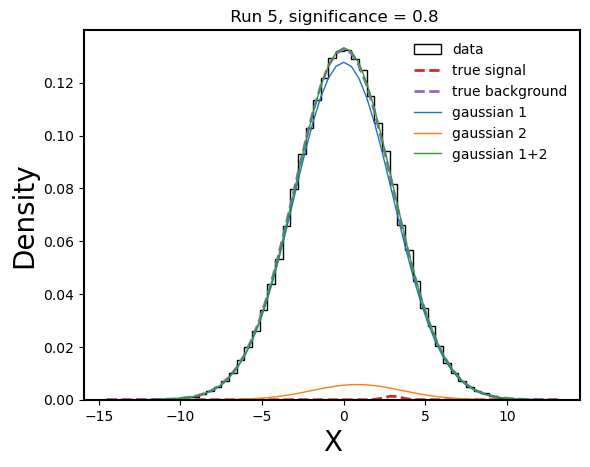

[-0.0100381  2.0632692]
[8.99515182 3.93041055]
[0.98611807 0.01388193]


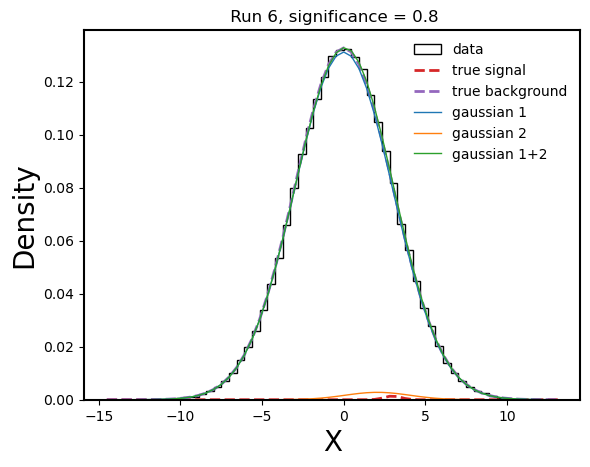

[-1.00380960e-02 -1.06259117e+01]
[8.99515182 2.89555762]
[9.99881419e-01 1.18581432e-04]


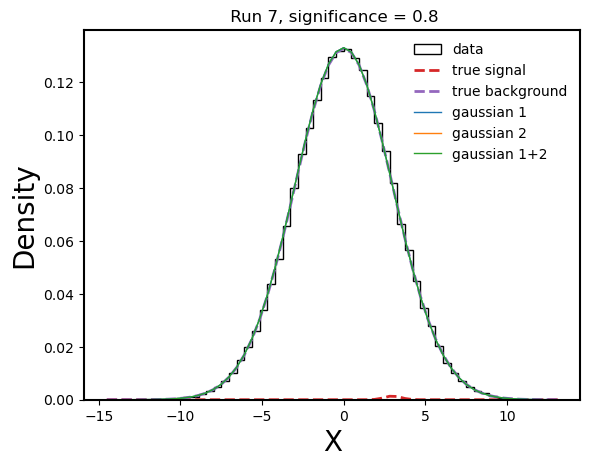

[-0.0100381   0.10282754]
[8.99515182 8.97478561]
[0.73159325 0.26840675]


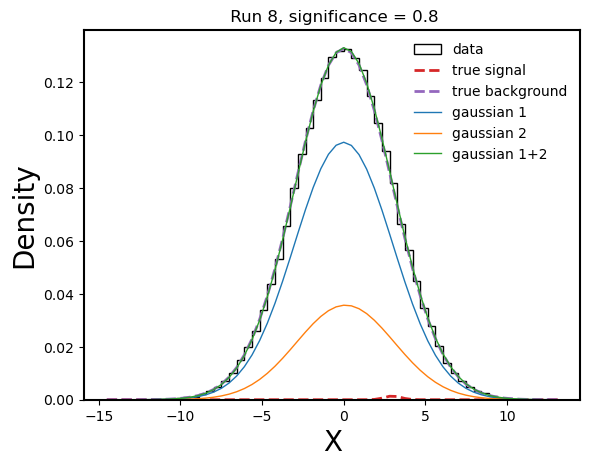

[-0.0100381   2.21259491]
[8.99515182 3.50498014]
[0.98759999 0.01240001]


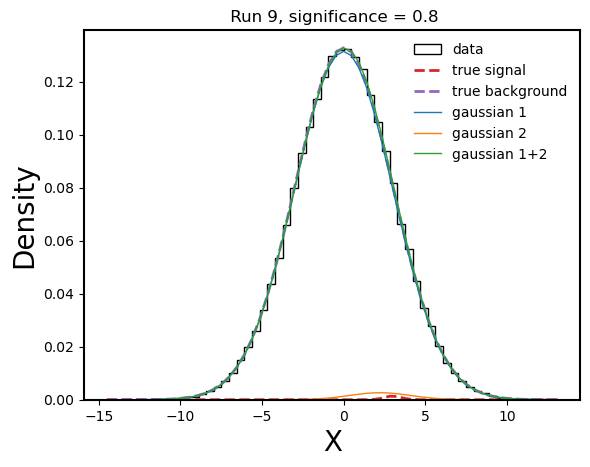

In [7]:
for sig_train in [0.8]:

    for run in range(10):

        x_train = data[str(sig_train)]['train']['data']
        bins = np.linspace(min(x_train.flatten()), max(x_train.flatten()), 60)
        x_axis = bins

        w1 = true_w[str(sig_train)][0]
        w2 = true_w[str(sig_train)][1]
        true_sig = norm.pdf(x_axis, sig_mean, sig_simga)*w1
        true_back = norm.pdf(x_axis, back_mean, back_sigma)*w2

        mu_ = best_parameters_modified[str(sig_train)][str(run)]['mu']
        sigma_ = best_parameters_modified[str(sig_train)][str(run)]['sigma']
        w_ = best_parameters_modified[str(sig_train)][str(run)]['w']
        print(mu_)
        print(sigma_)
        print(w_)
        plt.hist(x_train, density=True, color='black', bins=bins, histtype='step',
                    label='data')
        plt.plot(x_axis, true_sig, lw=2, c='C3', label='true signal',ls='--')
        plt.plot(x_axis, true_back, lw=2, c='C4', label='true background', ls='--')
        plt.plot(x_axis, w_[0] * norm.pdf(x_axis, mu_[0], np.sqrt(sigma_[0])), lw=1, c='C0', label='gaussian 1')
        plt.plot(x_axis, w_[1] * norm.pdf(x_axis, mu_[1], np.sqrt(sigma_[1])), lw=1, c='C1', label='gaussian 2')
        plt.plot(x_axis, w_[0] * norm.pdf(x_axis, mu_[0], np.sqrt(sigma_[0])) + w_[1] * norm.pdf(x_axis, mu_[1], np.sqrt(sigma_[1])), lw=1, c='C2', label='gaussian 1+2')
        plt.title(' Run {}, significance = {}'.format(run,sig_train))
        plt.xlabel(r"X", fontsize=20)
        plt.ylabel(r"Density", fontsize=20)
        plt.legend(frameon=False)
        plt.show()

In [8]:
score_likelihoods = {}
true_likelihoods = {}

for sig_train in sigs:
    score_likelihoods[str(sig_train)] = {}
    true_likelihoods[str(sig_train)] = {}

    x_val = data[str(sig_train)]['val']['data']
    label_val = data[str(sig_train)]['val']['label']

    w1 = true_w[str(sig_train)][0]
    w2 = true_w[str(sig_train)][1]

    true_likelihoods[str(sig_train)] = p_data(x_val,[sig_mean, back_mean],[sig_simga**2,back_sigma**2],[w1,w2])/p_back(x_val,back_mean,back_sigma**2)

    keys = list(best_parameters[str(sig_train)].keys())
    keys = [int(key) for key in keys]
    print(sig_train)
    print(keys)
    
    for run in keys:



        mu = best_parameters[str(sig_train)][str(run)]['mu']
        sigma = best_parameters[str(sig_train)][str(run)]['sigma']
        w = best_parameters[str(sig_train)][str(run)]['w']

        score_likelihoods[str(sig_train)][str(run)] = p_data(x_val,mu,sigma,w)/p_back(x_val,mu_background,sigma_background)





 




0.1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
score_likelihoods_modified = {}

for sig_train in sigs:
    score_likelihoods_modified[str(sig_train)] = {}

    x_val = data[str(sig_train)]['val']['data']
    label_val = data[str(sig_train)]['val']['label']


    keys = list(best_parameters_modified[str(sig_train)].keys())
    keys = [int(key) for key in keys]
    print(sig_train)
    print(keys)
    
    for run in keys:



        mu = best_parameters_modified[str(sig_train)][str(run)]['mu']
        sigma = best_parameters_modified[str(sig_train)][str(run)]['sigma']
        w = best_parameters_modified[str(sig_train)][str(run)]['w']

        score_likelihoods_modified[str(sig_train)][str(run)] = p_data(x_val,mu,sigma,w)/p_back(x_val,mu_background,sigma_background)



0.1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0.9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
summary_modified = {}
for sig_train in sigs:

    label_val = data[str(sig_train)]['val']['label']
    summary_modified[str(sig_train)] = {}


    sic_true , tpr_true , auc_true = SIC(label_val, true_likelihoods[str(sig_train)])
    sic_01 = SIC_fpr(label_val, true_likelihoods[str(sig_train)], 0.01)
    sic_001 = SIC_fpr(label_val, true_likelihoods[str(sig_train)], 0.001)
    
    # true summaries
    summary_modified[str(sig_train)]['true max sic'] = np.amax(sic_true)
    summary_modified[str(sig_train)]['true auc'] = auc_true
    summary_modified[str(sig_train)]['true sic_0.01'] = sic_01
    summary_modified[str(sig_train)]['true sic_0.001'] = sic_001

    max_sic_array = []
    auc_array = []
    sic_01_array = []
    sic_001_array = []

    keys = list(best_parameters_modified[str(sig_train)].keys())
    keys = [int(key) for key in keys]
    print(keys)

    for run in keys:
        sic , tpr , auc = SIC(label_val, score_likelihoods_modified[str(sig_train)][str(run)])
        sic_01 = SIC_fpr(label_val, score_likelihoods_modified[str(sig_train)][str(run)], 0.01)
        sic_001 = SIC_fpr(label_val, score_likelihoods_modified[str(sig_train)][str(run)], 0.001)

        max_sic_array.append(np.amax(sic))
        auc_array.append(auc)
        sic_01_array.append(sic_01)
        sic_001_array.append(sic_001)

    summary_modified[str(sig_train)]['max sic'] = max_sic_array
    summary_modified[str(sig_train)]['auc'] = auc_array
    summary_modified[str(sig_train)]['sic_0.01'] = sic_01_array
    summary_modified[str(sig_train)]['sic_0.001'] = sic_001_array
    

/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divid

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divid

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divid

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divi

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

In [11]:
summary = {}
for sig_train in sigs:

    label_val = data[str(sig_train)]['val']['label']
    summary[str(sig_train)] = {}


    sic_true , tpr_true , auc_true = SIC(label_val, true_likelihoods[str(sig_train)])
    sic_01 = SIC_fpr(label_val, true_likelihoods[str(sig_train)], 0.01)
    sic_001 = SIC_fpr(label_val, true_likelihoods[str(sig_train)], 0.001)
    
    # true summaries
    summary[str(sig_train)]['true max sic'] = np.amax(sic_true)
    summary[str(sig_train)]['true auc'] = auc_true
    summary[str(sig_train)]['true sic_0.01'] = sic_01
    summary[str(sig_train)]['true sic_0.001'] = sic_001

    max_sic_array = []
    auc_array = []
    sic_01_array = []
    sic_001_array = []

    keys = list(best_parameters[str(sig_train)].keys())
    keys = [int(key) for key in keys]
    print(keys)

    for run in keys:
        sic , tpr , auc = SIC(label_val, score_likelihoods[str(sig_train)][str(run)])
        sic_01 = SIC_fpr(label_val, score_likelihoods[str(sig_train)][str(run)], 0.01)
        sic_001 = SIC_fpr(label_val, score_likelihoods[str(sig_train)][str(run)], 0.001)

        max_sic_array.append(np.amax(sic))
        auc_array.append(auc)
        sic_01_array.append(sic_01)
        sic_001_array.append(sic_001)

    summary[str(sig_train)]['max sic'] = max_sic_array
    summary[str(sig_train)]['auc'] = auc_array
    summary[str(sig_train)]['sic_0.01'] = sic_01_array
    summary[str(sig_train)]['sic_0.001'] = sic_001_array
    

/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in di

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in div

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: invalid value encountered in divide
  sic = tpr/np.sqrt(fpr)
/home/rd804/m-anode/src/utils.py:13: RuntimeWarning: divide by zero encountered in d

In [12]:
sig_ = sigs

true_max_sic_array = []
true_auc_array = []
true_sic_01_array = []
true_sic_001_array = []

sic_mean_array = []
sic_std_array = []
auc_mean_array = []
auc_std_array = []
sic_01_mean_array = []
sic_01_std_array = []
sic_001_mean_array = []
sic_001_std_array = []

sic_mean_array_modified = []
sic_std_array_modified = []
auc_mean_array_modified = []
auc_std_array_modified = []
sic_01_mean_array_modified = []
sic_01_std_array_modified = []
sic_001_mean_array_modified = []
sic_001_std_array_modified = []

for sig_train in sig_:
    true_max_sic = summary[str(sig_train)]['true max sic']
    max_sic_mean = np.mean(summary[str(sig_train)]['max sic'])
    max_sic_std = np.std(summary[str(sig_train)]['max sic'])
    max_sic_mean_modified = np.mean(summary_modified[str(sig_train)]['max sic'])
    max_sic_std_modified = np.std(summary_modified[str(sig_train)]['max sic'])

    true_auc = summary[str(sig_train)]['true auc']
    auc_mean = np.mean(summary[str(sig_train)]['auc'])
    auc_std = np.std(summary[str(sig_train)]['auc'])
    auc_mean_modified = np.mean(summary_modified[str(sig_train)]['auc'])
    auc_std_modified = np.std(summary_modified[str(sig_train)]['auc'])

    true_sic_01 = summary[str(sig_train)]['true sic_0.01']
    sic_01_mean = np.mean(summary[str(sig_train)]['sic_0.01'])
    sic_01_std = np.std(summary[str(sig_train)]['sic_0.01'])
    sic_01_mean_modified = np.mean(summary_modified[str(sig_train)]['sic_0.01'])
    sic_01_std_modified = np.std(summary_modified[str(sig_train)]['sic_0.01'])

    true_sic_001 = summary[str(sig_train)]['true sic_0.001']
    sic_001_mean = np.mean(summary[str(sig_train)]['sic_0.001'])
    sic_001_std = np.std(summary[str(sig_train)]['sic_0.001'])
    sic_001_mean_modified = np.mean(summary_modified[str(sig_train)]['sic_0.001'])
    sic_001_std_modified = np.std(summary_modified[str(sig_train)]['sic_0.001'])


    sic_mean_array.append(max_sic_mean)
    sic_std_array.append(max_sic_std)
    auc_mean_array.append(auc_mean)
    auc_std_array.append(auc_std)
    sic_01_mean_array.append(sic_01_mean)
    sic_01_std_array.append(sic_01_std)
    sic_001_mean_array.append(sic_001_mean)
    sic_001_std_array.append(sic_001_std)

    sic_mean_array_modified.append(max_sic_mean_modified)
    sic_std_array_modified.append(max_sic_std_modified)
    auc_mean_array_modified.append(auc_mean_modified)
    auc_std_array_modified.append(auc_std_modified)
    sic_01_mean_array_modified.append(sic_01_mean_modified)
    sic_01_std_array_modified.append(sic_01_std_modified)
    sic_001_mean_array_modified.append(sic_001_mean_modified)
    sic_001_std_array_modified.append(sic_001_std_modified)

    true_max_sic_array.append(true_max_sic)
    true_auc_array.append(true_auc)
    true_sic_01_array.append(true_sic_01)
    true_sic_001_array.append(true_sic_001)



    

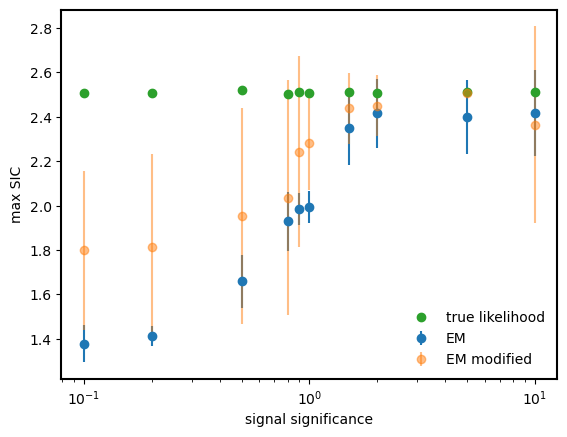

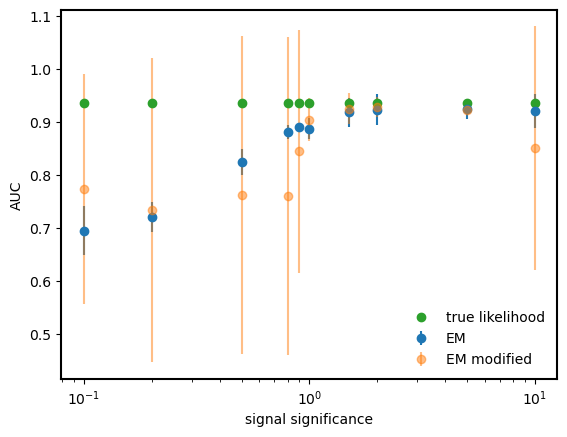

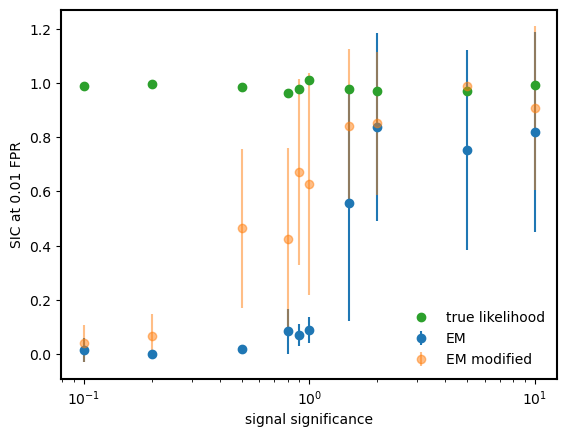

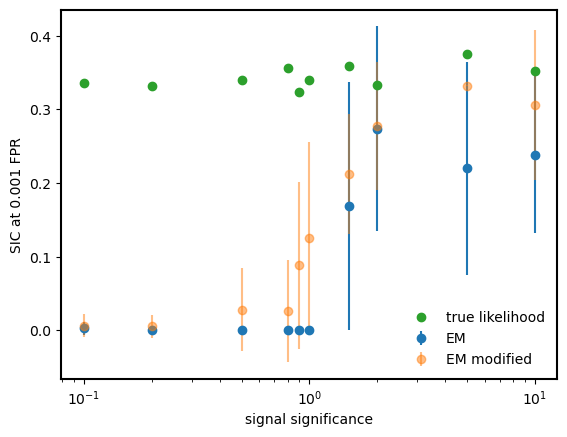

In [13]:
# plot max sic vs sig_ with error bars

plt.errorbar(sigs, sic_mean_array, yerr=sic_std_array, fmt='o', label='EM')
plt.errorbar(sigs, sic_mean_array_modified, yerr=sic_std_array_modified, fmt='o', label='EM modified', alpha=0.5)
plt.plot(sigs, true_max_sic_array, 'o', label='true likelihood')
plt.xlabel('signal significance')
plt.ylabel('max SIC')
plt.xscale('log')

plt.legend(frameon=False, loc = 'lower right')
plt.savefig('figures/max_sic_vs_sig.pdfmax_sic_vs_sig.pdf')
plt.show()

# plot auc vs sig_ with error bars
plt.errorbar(sigs, auc_mean_array, yerr=auc_std_array, fmt='o', label='EM')
plt.errorbar(sigs, auc_mean_array_modified, yerr=auc_std_array_modified, fmt='o', label='EM modified', alpha=0.5)
plt.plot(sigs, true_auc_array, 'o', label='true likelihood')
plt.xlabel('signal significance')
plt.ylabel('AUC')
plt.xscale('log')
plt.legend(frameon=False, loc = 'lower right')
plt.savefig('figures/auc_vs_sig.pdf')

plt.show()

# plot sic_01 vs sig_ with error bars

plt.errorbar(sigs, sic_01_mean_array, yerr=sic_01_std_array, fmt='o', label='EM')
plt.errorbar(sigs, sic_01_mean_array_modified, yerr=sic_01_std_array_modified, fmt='o', label='EM modified', alpha=0.5)
plt.plot(sigs, true_sic_01_array, 'o', label='true likelihood')
plt.xlabel('signal significance')
plt.ylabel('SIC at 0.01 FPR')
plt.xscale('log')

plt.legend(frameon=False, loc = 'lower right')
plt.savefig('figures/sic_01_vs_sig.pdf')
plt.show()

# plot sic_001 vs sig_ with error bars
plt.errorbar(sigs, sic_001_mean_array, yerr=sic_001_std_array, fmt='o', label='EM')
plt.errorbar(sigs, sic_001_mean_array_modified, yerr=sic_001_std_array_modified, fmt='o', label='EM modified', alpha=0.5)
plt.plot(sigs, true_sic_001_array, 'o', label='true likelihood')
plt.xlabel('signal significance')
plt.ylabel('SIC at 0.001 FPR')
plt.xscale('log')

plt.legend(frameon=False, loc = 'lower right')
plt.savefig('figures/sic_001_vs_sig.pdf')
plt.show()




In [17]:
1/(1 - (0.033*0.25)**2/(0.025**2))

1.122208506340478

In [30]:
1/(1-0.5*(0.033*0.25)**2/(0.018**2) + 3/8*(0.033*0.25)**4 / (0.018**4))

1.0970761945268703

In [32]:
sigma = (0.033*0.25)**2
Gamma = 0.018**2

print(1/(1-(sigma+Gamma)/2*sigma*Gamma))

1.000000000004323
